### Importacion de librerias 

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pandas as pd

In [2]:
df = pd.read_csv("../data/clean_dataset.csv")
df

,condition,price,automatic_relist,initial_quantity,sold_quantity,available_quantity,free_shipping,local_pick_up,num_payment_methods,title_length,...,listing_gold,listing_gold_premium,listing_gold_pro,listing_gold_special,listing_silver,buying_auction,buying_buy_it_now,buying_classified,status_active,status_paused
0,1,80.0,0,1,0,1,0,1,3,60,...,0,0,0,0,0,0,1,0,1,0
1,0,2650.0,0,1,0,1,0,1,2,57,...,0,0,0,0,1,0,1,0,1,0
2,0,60.0,0,1,0,1,0,1,3,43,...,0,0,0,0,0,0,1,0,1,0
3,1,580.0,0,1,0,1,0,1,3,52,...,0,0,0,0,1,0,1,0,1,0
4,0,30.0,0,1,0,1,0,1,3,25,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97246,0,30.0,0,1,0,1,0,1,2,59,...,0,0,0,0,0,0,1,0,1,0
97247,1,239.0,0,5,0,5,0,0,2,60,...,0,0,0,0,0,0,1,0,1,0
97248,0,600.0,0,1,0,1,0,0,0,22,...,0,0,0,0,0,0,1,0,1,0
97249,0,50.0,0,1,0,1,0,1,2,47,...,0,0,0,0,0,0,1,0,1,0


In [3]:

# Separar features y target
X = df.drop(columns=['condition'])
y = df['condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Diccionario de modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}


# Ejecutar los modelos y evaluar el rendimiento
for name, estimator in models.items():
    # Entrenar el modelo
    estimator.fit(X_train, y_train)
    
    # Hacer predicciones
    y_pred = estimator.predict(X_test)
    
    print(f"\n========== {name} ==========")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | Precision: {precision_score(y_test, y_pred):.4f} | Recall: {recall_score(y_test, y_pred):.4f} | F1-Score: {f1_score(y_test, y_pred):.4f}")


c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



========== Logistic Regression ==========
Accuracy: 0.7340 | Precision: 0.6827 | Recall: 0.9397 | F1-Score: 0.7908

========== Random Forest ==========
Accuracy: 0.8100 | Precision: 0.8288 | Recall: 0.8128 | F1-Score: 0.8208

========== Gradient Boosting ==========
Accuracy: 0.8249 | Precision: 0.8381 | Recall: 0.8340 | F1-Score: 0.8360


c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



========== XGBoost ==========
Accuracy: 0.8349 | Precision: 0.8513 | Recall: 0.8377 | F1-Score: 0.8445


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Separar features y target
X = df.drop(columns=['condition'])
y = df['condition']

# Detectar columnas numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Definir escalador
scaler = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)
], remainder='passthrough')  # deja otras columnas sin tocar

# Escalar los datos
X_scaled = scaler.fit_transform(X)

# Train-test split (sobre X ya escalado)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Diccionario de modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Ejecutar los modelos y evaluar el rendimiento
for name, estimator in models.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    print(f"\n========== {name} ==========")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f} | Precision: {precision_score(y_test, y_pred):.4f} | Recall: {recall_score(y_test, y_pred):.4f} | F1-Score: {f1_score(y_test, y_pred):.4f}")



========== Logistic Regression ==========
Accuracy: 0.7388 | Precision: 0.6905 | Recall: 0.9277 | F1-Score: 0.7917

========== Random Forest ==========
Accuracy: 0.8101 | Precision: 0.8291 | Recall: 0.8125 | F1-Score: 0.8207

========== Gradient Boosting ==========
Accuracy: 0.8249 | Precision: 0.8381 | Recall: 0.8340 | F1-Score: 0.8360

========== XGBoost ==========
Accuracy: 0.8349 | Precision: 0.8513 | Recall: 0.8377 | F1-Score: 0.8445


c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:28:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# Separar features y target
X = df.drop(columns=['condition'])
y = df['condition']

# Columnas numéricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Escalar solo numéricas
scaler = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols)
], remainder='passthrough')

# Transformar X
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Modelos
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='saga', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
}

# Evaluación y visualización
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Guardar métricas
    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    })

# Mostrar tabla de métricas
results_df = pd.DataFrame(results)
print("\n=== Comparación de modelos ===")
print(results_df.to_string(index=False))




=== Comparación de modelos ===
              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.727366   0.777699 0.727366  0.707785
      Random Forest  0.810087   0.810515 0.810087  0.810208
  Gradient Boosting  0.824945   0.825018 0.824945  0.824976
            XGBoost  0.834867   0.835163 0.834867  0.834954


In [4]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.model_selection import train_test_split

# Separar features y target
X = df.drop(columns=['condition'])
y = df['condition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

def model(X_train, X_test, y_train, y_test):
    # Modelos a usar
    models = [
        ('Logistic Regression', LogisticRegression(max_iter=1000, solver='saga', random_state=42)),
        ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=0))
    ]

    pipelines = []
    scores_data = pd.DataFrame(columns=['Model', 'F1_Score', 'Precision', 'Recall', 'Accuracy'])

    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        scores_data.loc[len(scores_data)] = {
            'Model': model_name,
            'F1_Score': f1_score(y_test, y_pred, average='weighted'),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'Accuracy': accuracy_score(y_test, y_pred)
        }

        pipelines.append(model)

    # Mostrar resultados ordenados por F1-Score
    print("\n=== Resultados de los Modelos ===")
    print(scores_data.sort_values(by='F1_Score', ascending=False).reset_index(drop=True))

    return pipelines, scores_data

# Llamar a la función
pipelines, scores_df = model(X_train, X_test, y_train, y_test)


c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



=== Resultados de los Modelos ===
                 Model  F1_Score  Precision    Recall  Accuracy
0              XGBoost  0.801922   0.802622  0.802458  0.802458
1    Gradient Boosting  0.790722   0.792084  0.791555  0.791555
2        Random Forest  0.774072   0.774146  0.774018  0.774018
3  Logistic Regression  0.395370   0.602837  0.540938  0.540938


In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

def modelPipeline(X_train, X_test, y_train, y_test):
    # Columnas numéricas y categóricas
    num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Preprocesador
    preprocessor = ColumnTransformer(transformers=[
        ('num', StandardScaler(with_mean=False), num_cols)
    ])

    # Modelos a usar
    clfs = [
        ('Logistic Regression', LogisticRegression(max_iter=1000, solver='saga', random_state=42)),
        ('Random Forest', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
        ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, verbosity=0)),
        ('KNN', KNeighborsClassifier()),
        ('SVM', SVC(probability=True))  # prob=True para posibilidad futura de ROC AUC
    ]

    # Resultados
    pipelines = []
    scores_data = pd.DataFrame(columns=['Model', 'F1_Score', 'Precision', 'Recall', 'Accuracy'])

    for clf_name, clf in clfs:
        pipeline = Pipeline(steps=[
            ('preprocessing', preprocessor),
            ('classifier', clf)
        ])

        # Entrenar
        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        # Métricas
        scores_data.loc[len(scores_data)] = {
            'Model': clf_name,
            'F1_Score': f1_score(y_test, y_pred, average='weighted'),
            'Precision': precision_score(y_test, y_pred, average='weighted'),
            'Recall': recall_score(y_test, y_pred, average='weighted'),
            'Accuracy': accuracy_score(y_test, y_pred)
        }

        pipelines.append(pipeline)

    return pipelines, scores_data

pipelines, scores_df = modelPipeline(X_train, X_test, y_train, y_test)
print(scores_df.sort_values(by='F1_Score', ascending=False).reset_index(drop=True))



c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


c:\Users\Michel Burgos\OneDrive\Documentos\GitHub\ml_exercise1\venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:05:18] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


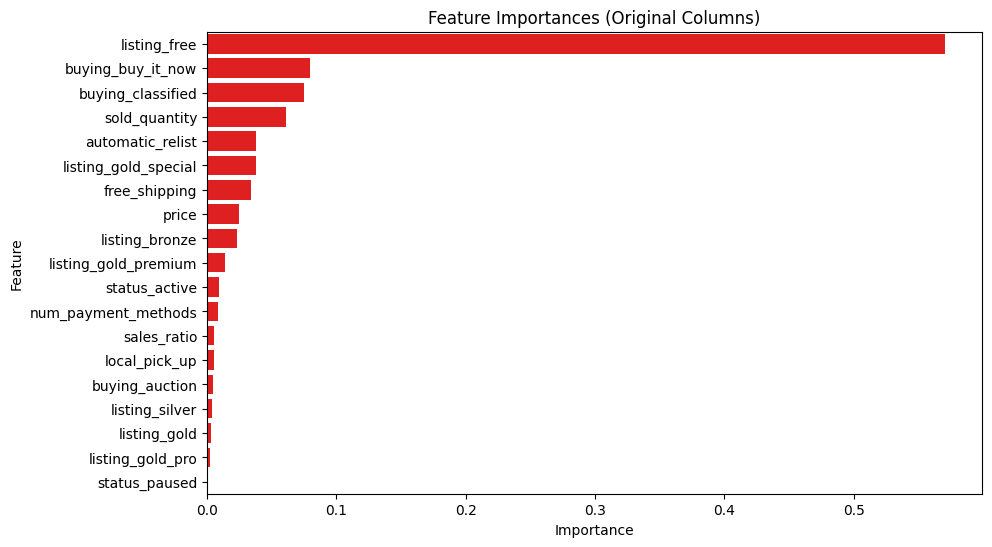

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
rf =  xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

original_col = X.columns.tolist()
# Filtrar el DataFrame para solo las columnas originales
feature_importance_df = feature_importance_df[feature_importance_df['Feature'].isin(original_col)]

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, color='red')
plt.title('Feature Importances (Original Columns)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [14]:
# Obtener importancias de características
importances = rf.feature_importances_

# Crear DataFrame con las importancias
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

# Filtrar por importancia mayor a 0.01
important_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Mostrar las features seleccionadas
print("Características seleccionadas:", important_features)

Características seleccionadas: ['price', 'automatic_relist', 'sold_quantity', 'free_shipping', 'listing_bronze', 'listing_free', 'listing_gold_premium', 'listing_gold_special', 'buying_buy_it_now', 'buying_classified']
